# Maps

Mark Klik & Misja Mikkers

# Packages

## Installing packages

First, we have to install some packages to create custom maps:


In [1]:
#install.packages('maptools', repos='http://cran.us.r-project.org')
#install.packages('rgdal', repos='http://cran.us.r-project.org')
#install.packages('rgeos', repos='http://cran.us.r-project.org')




also installing the dependency 'sp'



package 'sp' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\u873371\AppData\Local\Temp\RtmpS6fxdm\downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
rgdal 1.2-18 1.2-20              TRUE



installing the source package 'rgdal'

Warning message:
: running command '"C:/Anaconda3/R/bin/x64/R" CMD INSTALL -l "C:\Anaconda3\R\library" C:\Users\u873371\AppData\Local\Temp\RtmpS6fxdm/downloaded_packages/rgdal_1.2-20.tar.gz' had status 1Warning message:
In install.packages("rgdal", repos = "http://cran.us.r-project.org"): installation of package 'rgdal' had non-zero exit status

package 'rgeos' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\u873371\AppData\Local\Temp\RtmpS6fxdm\downloaded_packages


## Packages:

In [2]:
#install.packages("../Package//thematicmaps_2.1.tar.gz", repos = NULL, type = "source")

Warning message:
: running command '"C:/Anaconda3/R/bin/x64/R" CMD INSTALL -l "C:\Anaconda3\R\library" "../Package//thematicmaps_2.1.tar.gz"' had status 1Warning message:
In install.packages("../Package//thematicmaps_2.1.tar.gz", repos = NULL, : installation of package '../Package//thematicmaps_2.1.tar.gz' had non-zero exit status

In [11]:
install.packages('thematicmaps', repos='http://cran.us.r-project.org')
install.packages('tidyverse', repos='http://cran.us.r-project.org')
library(thematicmaps)
library(tidyverse)
library(stringr)

Warning message:
: package 'thematicmaps' is not available (for R version 3.3.2)also installing the dependencies 'stringi', 'jsonlite', 'stringr'




  There is a binary version available but the source version is later:
        binary source needs_compilation
stringi  1.1.7  1.2.2              TRUE



Warning message:
: package 'stringr' is in use and will not be installed

package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
: cannot remove prior installation of package 'jsonlite'

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\u873371\AppData\Local\Temp\RtmpS6fxdm\downloaded_packages


installing the source package 'stringi'

Warning message:
: running command '"C:/Anaconda3/R/bin/x64/R" CMD INSTALL -l "C:\Anaconda3\R\library" C:\Users\u873371\AppData\Local\Temp\RtmpS6fxdm/downloaded_packages/stringi_1.2.2.tar.gz' had status 1Warning message:
In install.packages("tidyverse", repos = "http://cran.us.r-project.org"): installation of package 'stringi' had non-zero exit status

ERROR: Error in library(thematicmaps): there is no package called 'thematicmaps'


Warning message:
: package 'tidyverse' was built under R version 3.3.3

ERROR: Error: package or namespace load failed for 'tidyverse'


# First map

To create maps you need polygon-data (data describing the polygons that constitute the map expressed in _x_ and _y_ coordinates). It is possible to buy this data from commercial parties, but more and more polygon data are published as open source data. For this course we used open source data from the CBS (central bureau of statitics in the Netherlands) and [Imergis](http://www.imergis.nl/asp/47.asp). To save you time, we converted the polygon data to _csv_ format.


For our first basic map, we need some data about the Netherlands. The polygon data from municipalities were previously saved as a _csv_ in the folder "Sourcedata".

In [14]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

,name,id,x,y,order,hole,piece,group
1,Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
2,Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
3,Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
4,Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
5,Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
6,Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


We will use package `thematicmaps` to make a map of the Netherlands. The package `thematicmaps` is an extension to the `ggplot2` package.

The command `MapPlot()` creates the appropriate _theme_ in ggplot (basically everything white and square axis scales). With the command
`AddMapLayer(MapPlot(), name_of_your_polygon_data)`, we can add a map to the drawing canvas:


In [15]:
AddMapLayer(MapPlot(), map_municipal)

ERROR: Error in eval(expr, envir, enclos): could not find function "AddMapLayer"


## Add information to the map:

We will now add some information to the map. We will read a _csv_ file with some municapal data and calculate the percentage of females in each municipality. To do this, we need some commands of `dplyr` (which we will discuss in the next lecture).

In [12]:
pop_data <- read.csv2("../Sourcedata/nld_municipal_data.csv")
map_info <- pop_data %>%
    select(name, pop_65plus)

str(map_info)

ERROR: Error in eval(expr, envir, enclos): could not find function "%>%"


ERROR: Error in str(map_info): object 'map_info' not found


Now we can add a data-layer by using the `AddMapLayer()` command. With `AddMapLayer()`, data from two datasets is combined internally. To do that, the first columns of the dataframes should have identical purpose. Please check dat 'map_info' and 'map_municipal' can be merged by the variable "name"

Please note, that because the package `thematicmaps` is based on `ggplot2`, we can add `ggplot2` commands. In this case, we have added a new legend title. Because the title is very long, we break the title into 2 substrings:


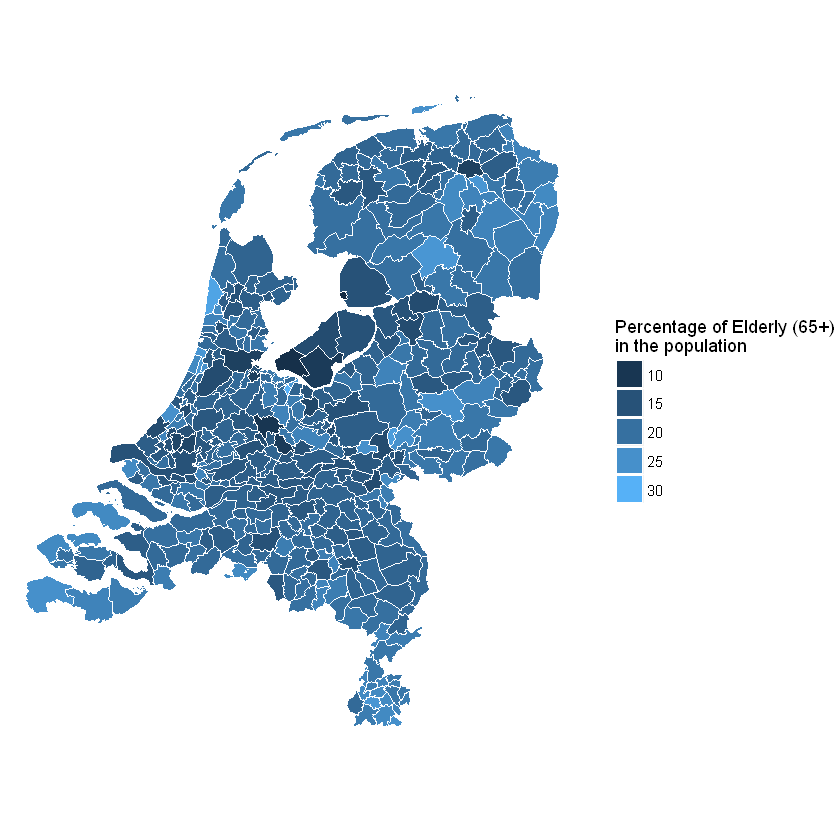

In [5]:
AddMapLayer(MapPlot(), map_municipal, map_info) +
  guides(fill = guide_legend(title = "Percentage of Elderly (65+)\nin the population"))

We can also add points to a map.

First we read the polygon data of the PC4 level as pc4_locations. We have prepared this in a _csv_ file "nld_pc4_locations.csv".

The _X_ and _Y_ colums have to be numeric. 

Since we only want a few points, we will just take a sample of the data and call this "sample_locations".

In [6]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

Warning message:
"package 'bindrcpp' was built under R version 3.3.3"

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


We will now take a sample of 10 locations:

In [7]:
sample_locations <- pc4_locations %>%
  sample_n(10, replace = FALSE)

head(sample_locations)

,PC4,X,Y
3490,8926,186406.0,580906.2
2986,7924,221314.6,518939.1
2412,6617,173554.6,429342.9
2840,7662,256743.0,495356.1
3160,8316,189447.3,523189.6
618,2405,105394.8,460091.3


We can now add our sample locations to the map using `AddPointsLayer()`:

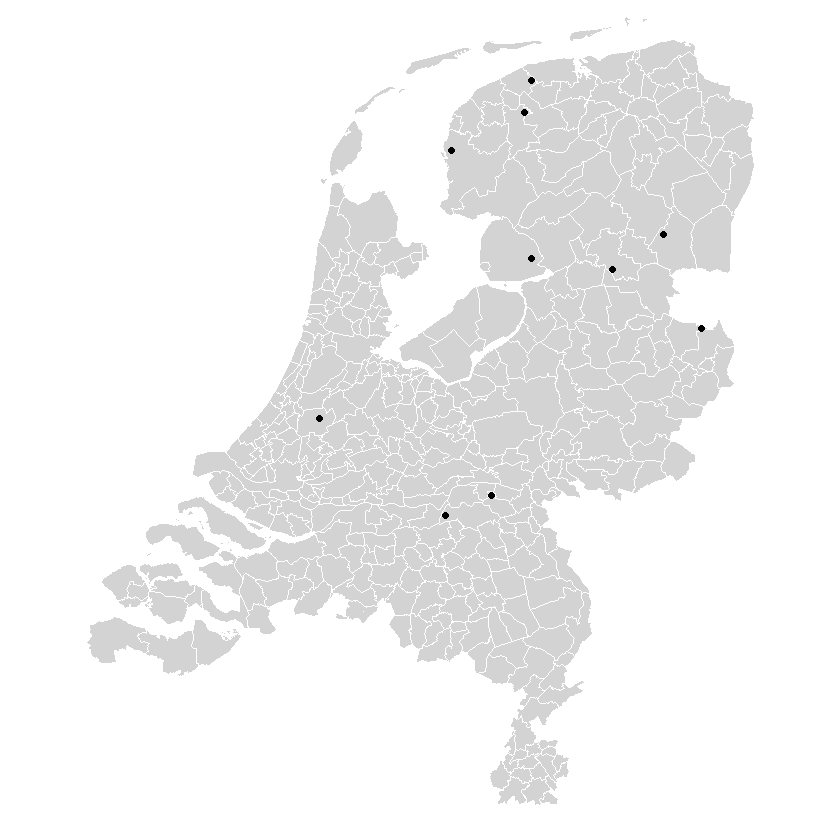

In [8]:
# display map with points
AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(sample_locations)

We can add a _Type_ to the specific locations:

In [9]:
sample_color <- sample_locations %>%
  mutate(Type = as.factor(sample(1:3, 10, replace = TRUE))) %>%
  select(PC4, Type)

And then add a color to the points based on their type:

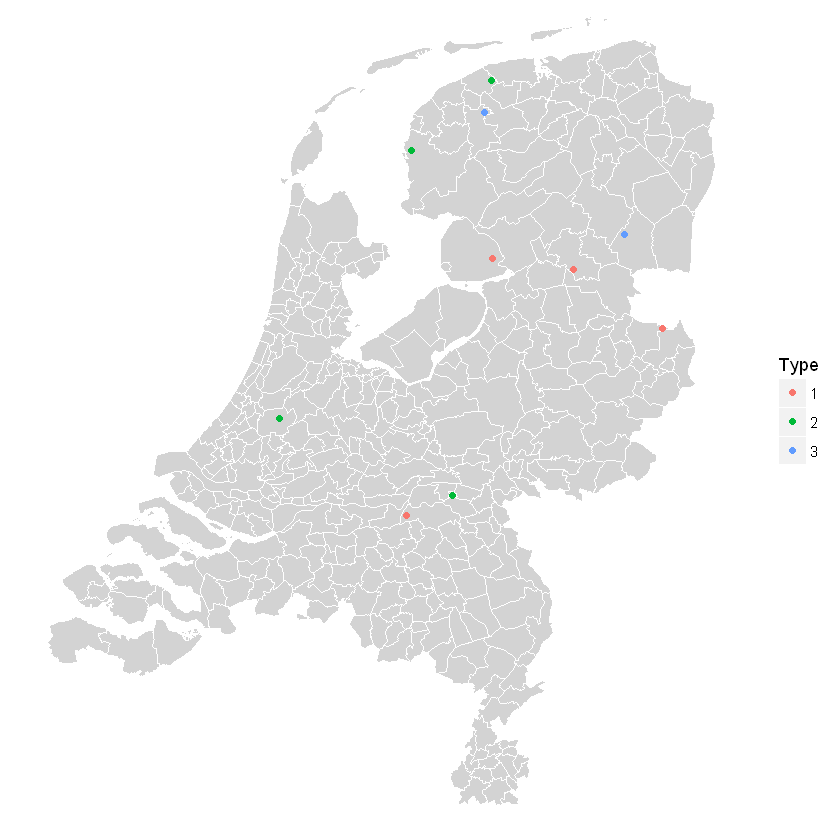

In [10]:
AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(sample_locations, sample_color, columnNameColor = "Type") 

Finally, we may want to add text to the map. Again, we will generate the data:

In [11]:
sample_text <- sample_locations%>%
  mutate(Label = c("A", "B", "C", "D", "E", "F", "G", "H", "I" ,"J")) %>%
  select(PC4, Label)

We can now add text to the map with the command `AddTextLayer()`


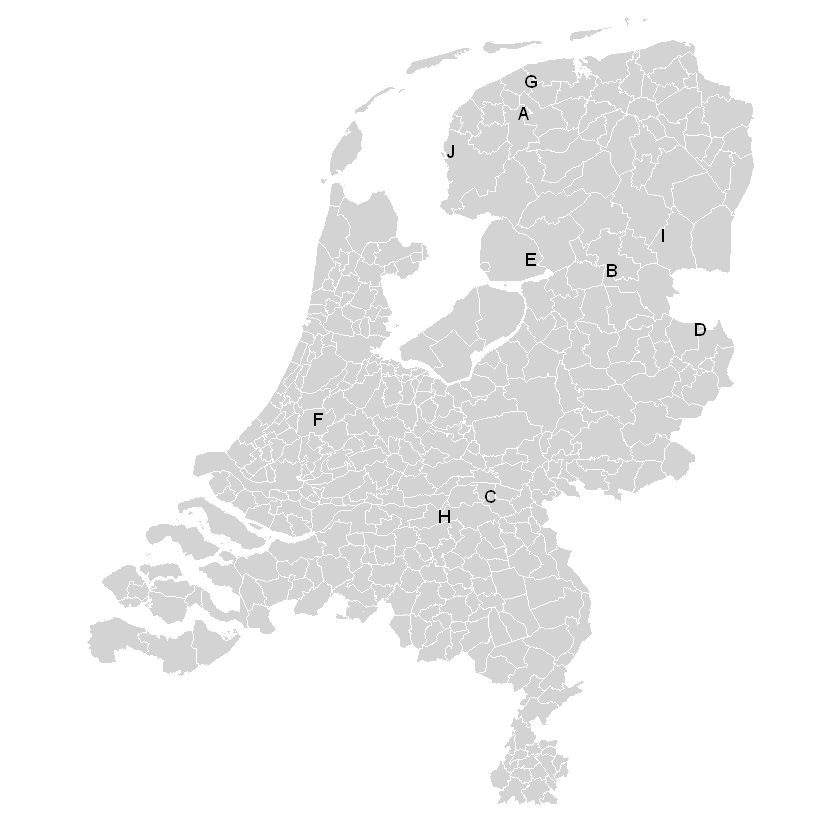

In [12]:
AddMapLayer(MapPlot(), map_municipal) %>%
    AddTextLayer(sample_locations, sample_text)

# Assignment

Create a map with hospital data. We have prepared a file _hospital.csv_ that contains data on hospitals.

## Assignment 1:

Read the data in as "hosp_data" and inspect the first rows:


In [ ]:
hosp_data <- read.csv2(" ../Sourcedata/hospital.csv")
head(hosp_data)

## Assignment 2:

Merge the data (using `dplyr`) from _hosp_data_ and _pc4_locations_ in a new dataframe _hosp_loc_, so that only data in both data frames are retained. Check the structure of the data.


In [ ]:
hosp_loc <- inner_join(hosp_data, pc4_locations, by='PC4') #zoekt pc4 waardes (x/y) bij de waardes uit hosp_data
str(hosp_loc)


## Assignment 3:

Create a map with the hospital locations as points and color the points according to the _type_ of hospital.



In [ ]:
AddMapLayer(MapPlot(), map_municipal) %>% #Kaart met 4 types ziekenhuizen in Nederland
AddPointsLayer(hosp_loc, columnNamecolor = "Hospital_Type") # Moet altijd bestaan uit variable 'hosp_loc', PC4 waarde (x en y)

End Notebook